In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 17s 0us/step


In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
y_train[0]

6

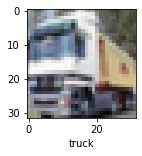

In [19]:
def plot_sample(x,y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])
plot_sample(x_train, y_train, 1)

In [21]:
x_train = x_train/255
x_test = x_test/255

In [1]:
x_train.shape

NameError: name 'x_train' is not defined

In [24]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
])

ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 116s 74ms/step - loss: 1.8098 - accuracy: 0.3565
Epoch 2/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.6204 - accuracy: 0.4292
Epoch 3/5
1563/1563 [==============================] - 94s 60ms/step - loss: 1.5405 - accuracy: 0.4558
Epoch 4/5
1563/1563 [==============================] - 96s 61ms/step - loss: 1.4780 - accuracy: 0.4806
Epoch 5/5
1563/1563 [==============================] - 95s 61ms/step - loss: 1.4294 - accuracy: 0.4959


In [26]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 6s 17ms/step - loss: 1.4222 - accuracy: 0.4940


[1.422173023223877, 0.49399998784065247]

In [33]:
from sklearn.metrics import classification_report
import numpy as np
y_predict = ann.predict(x_test)
y_predict_class = [np.argmax(element) for element in y_predict]


(10000, 10)

In [36]:
y_predict[0]
np.argmax(y_predict[0])

3

In [39]:
print('Classification Report: \n',classification_report(y_test, y_predict_class))

Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.57      0.56      1000
           1       0.68      0.53      0.59      1000
           2       0.44      0.22      0.30      1000
           3       0.36      0.34      0.35      1000
           4       0.41      0.45      0.43      1000
           5       0.42      0.36      0.39      1000
           6       0.57      0.52      0.54      1000
           7       0.47      0.65      0.54      1000
           8       0.52      0.71      0.60      1000
           9       0.53      0.59      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.49     10000
weighted avg       0.49      0.49      0.49     10000



In [42]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D( filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3) ),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D( filters=64, kernel_size=(3,3), activation='relu' ),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer= 'SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [43]:
cnn.fit(x_train, y_train, epochs= 10)

Epoch 1/10
1563/1563 [==============================] - 42s 27ms/step - loss: 2.0523 - accuracy: 0.2503
Epoch 2/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.6434 - accuracy: 0.4124
Epoch 3/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.4503 - accuracy: 0.4792
Epoch 4/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.3491 - accuracy: 0.5231
Epoch 5/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.2709 - accuracy: 0.5498
Epoch 6/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.2036 - accuracy: 0.5766
Epoch 7/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.1446 - accuracy: 0.5986
Epoch 8/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.0918 - accuracy: 0.6192
Epoch 9/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.0412 - accuracy: 0.6375
Epoch 10/10
1563/1563 [==============================] - 41s 27m

In [44]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.0996 - accuracy: 0.6148


[1.0995937585830688, 0.614799976348877]

In [45]:
y_test = y_test.reshape(-1,)

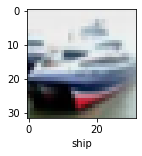

In [46]:
plot_sample(x_test, y_test, 1)

In [55]:
y_pred = cnn.predict(x_test)
y_predicted = [np.argmax(element) for element in y_pred] # cnn predicted value

In [73]:
def show_result(xt,yt,yp, index):
    
    
    plt.figure(figsize = (15,2))
    plt.imshow(xt[index])
    plt.xlabel(classes[yt[index]])
    print('Predicted value: ', classes[yp[index]])
    


Predicted value:  bird


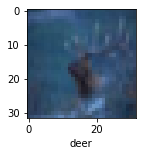

In [85]:
show_result(x_test,y_test, y_predicted, 22)

In [87]:
print(classification_report(y_test,y_class))

              precision    recall  f1-score   support

           0       0.76      0.57      0.65      1000
           1       0.76      0.76      0.76      1000
           2       0.49      0.52      0.51      1000
           3       0.42      0.47      0.45      1000
           4       0.63      0.47      0.54      1000
           5       0.62      0.43      0.51      1000
           6       0.47      0.89      0.62      1000
           7       0.82      0.60      0.69      1000
           8       0.70      0.78      0.74      1000
           9       0.72      0.65      0.68      1000

    accuracy                           0.61     10000
   macro avg       0.64      0.61      0.61     10000
weighted avg       0.64      0.61      0.61     10000

